<a href="https://colab.research.google.com/github/Santiagoxy/Laboratorios/blob/main/Copia_de_webScraping_cars_fromColab_Logan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Scraping Used Car Web Data: Case Study tucarrro.com (Colab version)
[Author: Elias Buitrago Bolivar](https://github.com/ebuitrago?tab=repositories)

This jupyter notebook depicts a python based web scraping  algorithm to obtain data to train a price car prediction machine learning algorithm. Used cars web data are extracted from [Tu Carro](www.tucarro.com.co). The code presented here is functional and was tested by scraping real data. This code version is compatible with Colab.
_Updated: Jun 20, 2024_


## Install required libraries

In [1]:
!pip install lxml
!pip install scrapy
!pip3 install requests-html
!pip3 install selenium

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 290.1/290.1 kB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.8/247.8 kB 15.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.6/97.6 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.6/74.6 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.9/82.9 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.9/143.9 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 9.6 MB/s eta 0:00:00
  Attempting uninstall: urllib3
    Found existing installation: urllib3 2.0.7
    Uninstalling urllib3-2.0.7:
      Successfully uninstalled urllib3-2.0.7
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 46.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.7/475.7 kB 31.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
%%shell
# Install chromedriver
# Credits: https://medium.com/@MinatoNamikaze02/running-selenium-on-google-colab-a118d10ca5f8
sudo apt -y update
sudo apt install -y wget curl unzip
wget http://archive.ubuntu.com/ubuntu/pool/main/libu/libu2f-host/libu2f-udev_1.1.4-1_all.deb
dpkg -i libu2f-udev_1.1.4-1_all.deb
wget https://dl.google.com/linux/direct/google-chrome-stable_current_amd64.deb
dpkg -i google-chrome-stable_current_amd64.deb

wget -N https://edgedl.me.gvt1.com/edgedl/chrome/chrome-for-testing/120.0.6099.62/linux64/chromedriver-linux64.zip -P /tmp/
unzip -o /tmp/chromedriver-linux64.zip -d /tmp/
chmod +x /tmp/chromedriver-linux64/chromedriver
mv /tmp/chromedriver-linux64/chromedriver /usr/local/bin/chromedriver

pip install selenium chromedriver_autoinstaller

Get:1 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:3 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [973 kB]
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:7 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [1,994 kB]
Hit:8 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Get:9 http://security.ubuntu.com/ubuntu jammy-security/universe amd64 Packages [1,125 kB]
Get:10 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ Packages [55.6 kB]
Get:11 http://security.ubuntu.com/ubuntu jammy-security/restricted amd64 Packages [2,591 kB]
Get:12 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelea

### Web Scraping Used Car Sales Data
This section explains the web scraping process implemented to obtain the data from the used car sales web site [Tu Carro](www.tucarro.com.co).

In [3]:
!pip install undetected_chromedriver

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.4/65.4 kB 1.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for undetected_chromedriver: filename=undetected_chromedriver-3.5.5-py3-none-any.whl size=47048 sha256=fc8fc495eb1eca814e0eaf771268b7aeb2c961e3333758baeca811276c0b05c3
  Stored in directory: /root/.cache/pip/wheels/cf/a1/db/e1275b6f7259aacd6b045f8bfcb1fcbc93827a3916ba55d5b7
Successfully built undetected_chromedriver


## Import required libraries


---

In [4]:
'''
credits:
https://github.com/googlecolab/colabtools/issues/3347
https://stackoverflow.com/questions/51046454/how-can-we-use-selenium-webdriver-in-colab-research-google-com
Sept 19, 2023
'''

#
!pip3 install chromedriver-autoinstaller

In [5]:
import sys
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')

import time
import pandas as pd
from bs4 import BeautifulSoup as bs
from selenium import webdriver
import chromedriver_autoinstaller
import json

## Setup chrome and chrome driver


---



In [6]:
# setup chrome options
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless') # ensure GUI is off
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')

# # set path to chromedriver as per your configuration
chromedriver_autoinstaller.install()

'/usr/local/lib/python3.10/dist-packages/chromedriver_autoinstaller/126/chromedriver'


## Section to declare functions

---



### Function scrapebyPages

In [7]:
def scrapebyPages(brand,model,min, max):
  #Range of pages from the total search to scrape in.
  #It is recomended to cover a range of one hundred pages in each iteration of this section.
  data = pd.DataFrame()
  for i in range(min,max):

      print(f'************************************')
      print(f'WEB SCRAPING FROM SEARCH PAGE #{i}')
      pag = i
      url = f'https://vehiculos.tucarro.com.co/{brand}/{model}/_Desde_{49*i}_NoIndex_True'

      driver = webdriver.Chrome(options=chrome_options)
      driver.get(url)
      driver.implicitly_wait(10)
      html = driver.page_source
      soup = bs(html,'lxml')

      #Get href
      links = gethref(soup)

      p = []
      #Scraping
      for i in range(0,len(links)):
          print('Scrapping', i, '/', len(links), '...')
          p.append(scrapper(links[i]))
          print(f'Este es el valor de p[i]: {p[i]}')

      # append list to DataFrame
      temp_df = pd.DataFrame(p)
      data = pd.concat([data, temp_df], ignore_index=True)

  #Close the web browser tab
  driver.close()

  # quit the driver
  driver.quit()

  return data

### Function gethref

In [8]:
#Function to get 'href' from each article item
def gethref(soup):

    links = []
    for link in soup.findAll('a'):
      url_car = link.get('href')
      if 'MCO-' in url_car:
        # print(url_car)          %Print each car url as a validity test
        links.append(url_car)

    print("Href obtained: ", len(links))

    return links
    # return

### Function scrapper

In [9]:
#Function to call housing_features routine on each href
def scrapper(url_car):

    # set up the webdriver
    driver = webdriver.Chrome(options=chrome_options)

    # Scrape
    driver.get(url_car)
    driver.implicitly_wait(10)
    html=driver.page_source

    #Obtaining the html from the web page after applying Selenium
    soup = bs(html,'lxml')

    #Create a list to store info obtained from one particular property
    features = []

    #Applying function to obtain variables defined from one particular property
    features = extract_cars_features(soup)

    #Close the web browser tab
    driver.close()

    # quit the driver
    driver.quit()

    return(features)

### Function extract_cars_features

In [10]:
# Version 1.0
def extract_cars_features(soup):

  features_list = []

  # car_name
  try:
    car_name = soup.find('h1',{'class': 'ui-pdp-title'}).text
    features_list.append(car_name)
    # print(f"Car's name is: {car_name}")
  except:
    car_name = ' '
    features_list.append(car_name)

  # price
  try:
    price=soup.find('div',{'class': 'ui-pdp-price__second-line'}).text
    features_list.append(price)
    # print(f"Car's price is: {price}")
  except:
    price = 0
    features_list.append(price)

  # year_car
  try:
    year_kms_datePub = soup.find('div',{'class': 'ui-pdp-header__subtitle'}).text.split(' ')
    year = year_kms_datePub[0]
    features_list.append(year)
  except:
    year = 0
    features_list.append(year)

  # kms
  try:
    year_kms_datePub = soup.find('div',{'class': 'ui-pdp-header__subtitle'}).text.split(' ')
    kms = year_kms_datePub[2]
    features_list.append(kms)
  except:
    kms = 0
    features_list.append(kms)
  # print(f"Kms: {kms}")

# color and Fuel Type
  try:
    script = soup.find("script", {'type': 'application/ld+json'})
    if script:
      # Obtain script content
      script_text = json.loads(script.string)

      # Extract json keys for color and fuel type
      color = script_text.get('color', 'Color not found')
      fuel = script_text.get('fuelType','Fuel type not found')

      # Append results
      features_list.extend([color, fuel])
    else:
      print("JavaScript script was not found on the page.")
  except json.JSONDecodeError as e:
      print("Error decoding JSON:", str(e))
      # Append default values in case of JSON decoding error
      features_list.extend([0, 0])
  except Exception as e:
      print("An unexpected error occurred:", str(e))
      # Handle unexpected errors gracefully
      features_list.extend([0, 0])


  # print(features_list)


  return features_list

## Start scraping

---

In [11]:
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By

In [13]:
"""
 The input parameters for the 'scrapebyPages' function are: Brand name, Car model
 name. Be careful to write the brand and model names exactly as they are in tucarro.com.
 The third input parameter is the initial results page (always initialize to 1)
 and the fourth input parameter is the final results page you want to download data from;
 this parameter depends on the amount of results pages your car returns
 for the brand and model you want to get data from. So, it is recommended to search
 the web portal first to find out how many pages of results you can get
 for the car you want to get data from.
"""

car_brand = 'renault'   # Brand car name. Ej: chevrolet, renault, kia.
car_model = 'logan'        # Model car name. Ej: duster, onix, rio.
data = scrapebyPages(car_brand,car_model,1,10)
scrapebyPages(1,2)

************************************
WEB SCRAPING FROM SEARCH PAGE #1
Href obtained:  48
Scrapping 0 / 48 ...
Este es el valor de p[i]: ['Renault Logan Expression mecánico', '$34.500.000', '2018', '93.500', 'Plateado', 'Gasolina']
Scrapping 1 / 48 ...
Este es el valor de p[i]: ['Renault Logan AUTHENTIQUE  1600CC MT AA', '$30.500.000', '2016', '75.200', 'Plateado', 'Gasolina']
Scrapping 2 / 48 ...
Este es el valor de p[i]: ['Renault Logan Familier  1400cc Mt Aa', '$27.000.000', '2014', '156.450', 'Gris', 'Gasolina']
Scrapping 3 / 48 ...
Este es el valor de p[i]: ['Renault Logan AUTHENTIQUE  1600CC MT AA', '$34.000.000', '2016', '102.685', 'Negro', 'Gasolina']
Scrapping 4 / 48 ...
Este es el valor de p[i]: ['Renault Logan Life 1.6 Mecanico Sedan', '$48.500.000', '2023', '26.800', 'Gris', 'Gasolina']
Scrapping 5 / 48 ...
Este es el valor de p[i]: ['Renault Logan Expression Night & Day  1600cc Mt Aa', '$36.500.000', '2018', '96.060', 'Plateado', 'Gasolina']
Scrapping 6 / 48 ...
Este es el 

TypeError: scrapebyPages() missing 2 required positional arguments: 'min' and 'max'

In [14]:
cols = ['car_model','price','year_model','kms','color','fueltype']
data.columns = cols
print(data.shape)
data.head()

(432, 6)


,car_model,price,year_model,kms,color,fueltype
0,Renault Logan Expression mecánico,$34.500.000,2018,93.500,Plateado,Gasolina
1,Renault Logan AUTHENTIQUE 1600CC MT AA,$30.500.000,2016,75.200,Plateado,Gasolina
2,Renault Logan Familier 1400cc Mt Aa,$27.000.000,2014,156.450,Gris,Gasolina
3,Renault Logan AUTHENTIQUE 1600CC MT AA,$34.000.000,2016,102.685,Negro,Gasolina
4,Renault Logan Life 1.6 Mecanico Sedan,$48.500.000,2023,26.800,Gris,Gasolina


In [16]:
from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('price').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

NameError: name '_df_1' is not defined

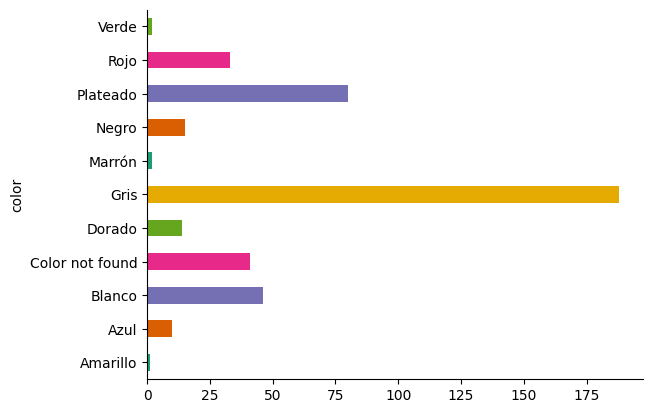

In [17]:
# @title color

from matplotlib import pyplot as plt
import seaborn as sns
data.groupby('color').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [20]:
saved_name=f'usedCarsCol_{car_model}_200624.csv'
data.to_csv(saved_name, encoding='utf-8', index=False)

# Nueva sección

### Testing code for scraping only one page
This section provides a testing code for one page web scraping results

In [19]:
#*****************************
#Code for testing in one page
#*****************************
import json

brand = 'kia'   # Brand car name. Ej: chevrolet, renault, kia.
model = 'rio'   # Model car name. Ej: duster, onix, rio.

# url = f'https://vehiculos.tucarro.com.co/{model}-{brand}'
url = f'https://vehiculos.tucarro.com.co/{brand}/{model}/_Desde_{49*1}_NoIndex_True'
print(url)

#Function to call cars_features routine on each href
def scrapper(url_car):

    # set up the webdriver
    driver = webdriver.Chrome(options=chrome_options)

    # Scrape
    driver.get(url_car)
    driver.implicitly_wait(10)
    html=driver.page_source

    #Obtaining the html from the web page after applying Selenium
    soup = bs(html,'lxml')

    #Create a list to store info obtained from one particular property
    features = []

    #Applying function to obtain variables defined from one particular property
    features = extract_cars_features(soup)

    #Close the web browser tab
    driver.close()

    # quit the driver
    driver.quit()

    return(features)


def extract_cars_features(soup):

  features_list = []

  # car_name
  try:
    car_name = soup.find('h1',{'class': 'ui-pdp-title'}).text
    features_list.append(car_name)
    # print(f"Car's name is: {car_name}")
  except:
    car_name = ' '
    features_list.append(car_name)

  # price
  try:
    price=soup.find('div',{'class': 'ui-pdp-price__second-line'}).text
    features_list.append(price)
    # print(f"Car's price is: {price}")
  except:
    price = 0
    features_list.append(price)

  # year_car
  try:
    year_kms_datePub = soup.find('div',{'class': 'ui-pdp-header__subtitle'}).text.split(' ')
    year = year_kms_datePub[0]
    features_list.append(year)
  except:
    year = 0
    features_list.append(year)

  # kms
  try:
    year_kms_datePub = soup.find('div',{'class': 'ui-pdp-header__subtitle'}).text.split(' ')
    kms = year_kms_datePub[2]
    features_list.append(kms)
  except:
    kms = 0
    features_list.append(kms)
  # print(f"Kms: {kms}")

 # color and Fuel Type
  try:
    script = soup.find("script", {'type': 'application/ld+json'})
    if script:
      # Obtain script content
      script_text = json.loads(script.string)

      # Extract json keys for color and fuel type
      color = script_text.get('color', 'Color not found')
      fuel = script_text.get('fuelType','Fuel type not found')

      # Append results
      features_list.extend([color, fuel])
    else:
      print("JavaScript script was not found on the page.")
  except json.JSONDecodeError as e:
      print("Error decoding JSON:", str(e))
      # Append default values in case of JSON decoding error
      features_list.extend([0, 0])
  except Exception as e:
      print("An unexpected error occurred:", str(e))
      # Handle unexpected errors gracefully
      features_list.extend([0, 0])

  return features_list


driver = webdriver.Chrome(options=chrome_options)
driver.get(url)
driver.implicitly_wait(10)
html = driver.page_source
soup = bs(html,'lxml')

#Get href
links = []
for link in soup.findAll('a'):
  url_car = link.get('href')
  if 'MCO-' in url_car:
    links.append(url_car)
print("Href obtained: ", len(links))

p = []
#Scraping
for i in range(0,len(links)):
  print('Scrapping', i, '/', len(links), '...')
  p.append(scrapper(links[i]))
  print(f'Este es el valor de p[i]: {p[i]}')

temp_df = pd.DataFrame(p)
# data = pd.concat([data, temp_df], ignore_index=True)

#Close the web browser tab
driver.close()

# quit the driver
driver.quit()


temp_df.head()

https://vehiculos.tucarro.com.co/kia/rio/_Desde_49_NoIndex_True
Href obtained:  0


""


## Referencias
---



https://github.com/kiteco/kite-python-blog-post-code/blob/master/Web%20Scraping%20Tutorial/script.py

https://medium.com/geekculture/scrappy-guide-to-web-scraping-with-python-475385364381

https://stackoverflow.com/questions/47730671/python-3-using-requests-does-not-get-the-full-content-of-a-web-page